In [1]:
import networkx as nx

n = 15
G = nx.complete_graph(n)

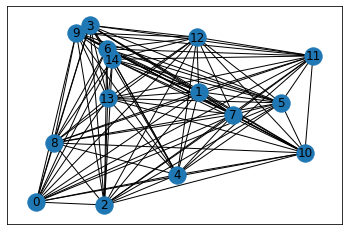

In [2]:
import random

my_pos = { i:(random.random(),random.random()) for i in G.nodes}
nx.draw_networkx(G,my_pos,with_labels=True)

In [3]:
import math
def eucl_dist(x1,y1,x2,y2):
    return math.sqrt( (x1-x2)**2 + (y1-y2)**2 )

for i,j in G.edges:
    (x1,y1) = my_pos[i]
    (x2,y2) = my_pos[j]
    G.edges[i,j]['length'] = eucl_dist(x1,y1,x2,y2)

In [4]:
import gurobipy as gp
from gurobipy import GRB

In [5]:
m = gp.Model()
x = m.addVars(G.edges, vtype=GRB.BINARY)

m.setObjective(gp.quicksum(G.edges[e]['length']*x[e] for e in G.edges), GRB.MINIMIZE)

m.addConstrs(gp.quicksum(x[e] for e in G.edges if e in G.edges(i))==2 for i in G.nodes)

m.optimize()

Set parameter Username
Academic license - for non-commercial use only - expires 2024-03-18
Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 15 rows, 105 columns and 210 nonzeros
Model fingerprint: 0x6165368f
Variable types: 0 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 2e+00]
Found heuristic solution: objective 8.6320353
Presolve time: 0.00s
Presolved: 15 rows, 105 columns, 210 nonzeros
Variable types: 0 continuous, 105 integer (105 binary)

Root relaxation: objective 3.249968e+00, 21 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestB

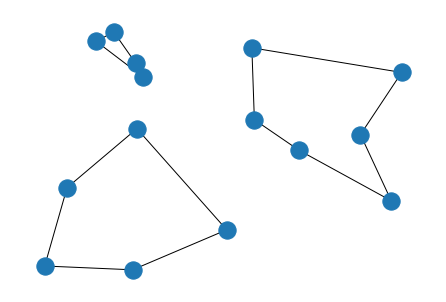

In [6]:
tour_edges = [e for e in G.edges if x[e].x>0.5]
nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)

Gurobi Optimizer version 10.0.1 build v10.0.1rc0 (win64)

CPU model: Intel(R) Core(TM) i7-8565U CPU @ 1.80GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Optimize a model with 18 rows, 105 columns and 241 nonzeros
Model fingerprint: 0x2852630e
Variable types: 0 continuous, 105 integer (105 binary)
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [5e-02, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [2e+00, 5e+00]

MIP start from previous solve did not produce a new incumbent solution
MIP start from previous solve violates constraint R15 by 1.000000000

Found heuristic solution: objective 8.6320353
Presolve time: 0.00s
Presolved: 18 rows, 105 columns, 241 nonzeros
Variable types: 0 continuous, 105 integer (105 binary)

Root relaxation: objective 3.350757e+00, 24 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Ex

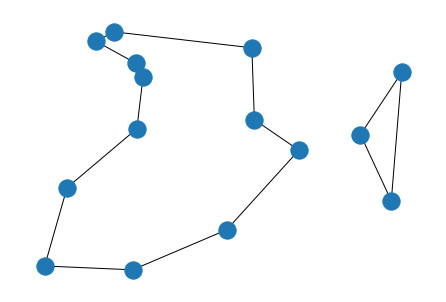

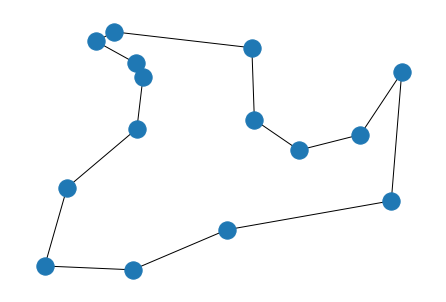

In [7]:
import matplotlib.pyplot as plt

while not nx.is_connected(G.edge_subgraph(tour_edges)):
    for component in nx.connected_components(G.edge_subgraph(tour_edges)):
        inner_edges = [(i,j) for (i,j) in G.edges if i in component and j in component]
        m.addConstr(gp.quicksum(x[e] for e in inner_edges)<=len(component)-1)
    m.optimize()
    tour_edges = [e for e in G.edges if x[e].x>0.5]
    plt.figure()
    nx.draw(G.edge_subgraph(tour_edges), pos=my_pos)